# Аномалии в данных и их автоматический поиск

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/задания к курсу/students.csv', delimiter=',')

Средство визуализации (ящик с усами)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


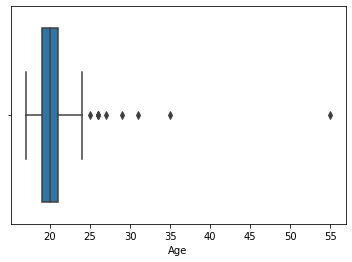

In [ ]:
sns.boxplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


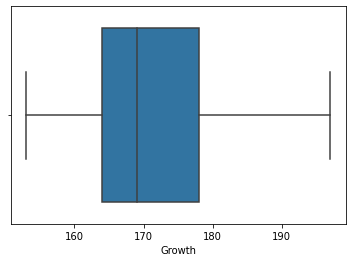

In [ ]:
sns.boxplot(df['Growth'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


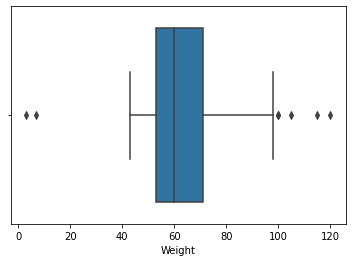

In [ ]:
sns.boxplot(df['Weight'])

# Первая Процедура поиска выбросов

m - среднее значение признака .mean()

s - отклонение признака .std()

Построить интервал [m-3s, m+3s]. Все объекты, значение признака которых не попадет в этот интервал, нужно объявить выбросами и удалить из таблицы.

Поицем выбросы относительно признака "ВЕС"

In [ ]:
m=df['Weight'].mean()
s=df['Weight'].std()
m-3*s, m+3*s

(14.52494740231539, 113.53874686520054)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


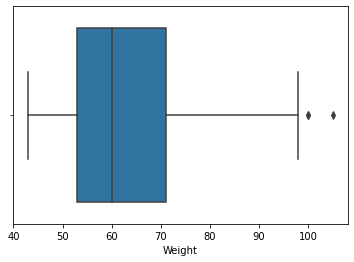

In [ ]:
df=df[(df['Weight']<m+3*s) & (df['Weight']>m-3*s)]
sns.boxplot(df['Weight'])

In [ ]:
m=df['Age'].mean()
s=df['Age'].std()
m-3*s, m+3*s

(13.016722543916735, 27.87216634497215)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


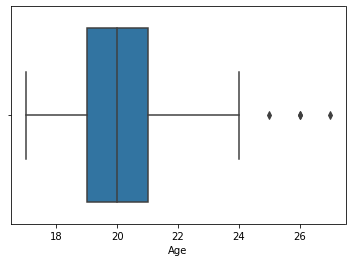

In [ ]:
df=df[(df['Age']<m+3*s) & (df['Age']>m-3*s)]
sns.boxplot(df['Age'])

# Вторая процедура поиска выбросов

a - 25-ая процентиль признака

b - 75-ая процентиль признака

Построим интервал:

[a-1.5(b-a), b+1.5(b-a)]

Значения признака, не попавшего в указаннный интервал объявить выбросам

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/students.csv', delimiter=',')
#заново загрузим данные, так как мы раньше изменяли таблицу df

In [ ]:
df.describe()

,Age,Growth,Shoe size,Course number,Year of birth,Friend number,Russian rating,Maths rating,Physics rating,Computer science rating,...,Height of 5000 mm,Width of 5000 mm,Putin age,Hair length,Floor number,Social network duration min,City population,MIddle and index finger,Middle and ring finger,Middle and little finger
count,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,186.000000,...,186.000000,186.000000,186.000000,186.000000,186.000000,1.860000e+02,1.860000e+02,186.000000,186.000000,186.000000
mean,20.688172,170.661290,39.715054,3.500000,1991.107527,374.032258,81.634409,58.177419,13.182796,32.801075,...,75.720430,177.688172,690.236559,34.365054,6.322581,5.417500e+08,7.946669e+05,9.741935,9.705376,28.798925
std,3.468713,9.055881,2.814920,3.147285,132.099550,2199.541507,14.325019,29.575478,26.414552,38.992282,...,107.747088,240.978320,7360.321689,25.672211,4.338791,7.332267e+09,6.093052e+05,4.385241,6.894963,19.710011
min,17.000000,153.000000,34.000000,0.000000,200.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,42.000000,0.200000,1.000000,0.000000e+00,1.000000e+00,0.000000,0.000000,0.000000
25%,19.000000,164.000000,38.000000,2.000000,2000.000000,74.500000,76.000000,50.000000,0.000000,0.000000,...,50.000000,100.000000,67.000000,12.000000,3.000000,1.200000e+02,7.000000e+05,7.000000,6.000000,20.000000
50%,20.000000,169.000000,39.000000,3.000000,2001.500000,130.000000,85.000000,70.000000,0.000000,0.000000,...,60.000000,140.000000,69.000000,30.000000,5.000000,2.000000e+02,8.000000e+05,10.000000,10.000000,28.500000
75%,21.000000,178.000000,42.000000,4.000000,2003.000000,236.000000,91.000000,76.750000,0.000000,75.000000,...,70.000000,167.250000,70.000000,50.000000,8.000000,3.600000e+02,8.845000e+05,12.000000,12.000000,35.000000
max,55.000000,197.000000,48.000000,37.000000,2004.000000,30000.000000,100.000000,100.000000,97.000000,98.000000,...,950.000000,1800.000000,100000.000000,150.000000,20.000000,1.000000e+11,8.000000e+06,30.000000,80.000000,250.000000


In [ ]:
df['Age'].quantile(0.25), df['Age'].quantile(0.75)

(19.0, 21.0)

In [ ]:
df['Weight'].quantile(0.25)
#найти 25-ую процентиль признака Weight

In [ ]:
a=df['Age'].quantile(0.25)
b=df['Age'].quantile(0.75)

In [ ]:
#[a-1.5(b-a), b+1.5(b-a)]
# расчет границ этого интервала
a-1.5*(b-a), b+1.5*(b-a)

(16.0, 24.0)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


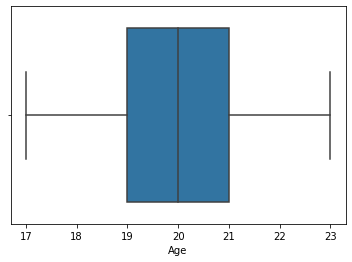

In [ ]:
df=df[(df['Age']<b+1.5*(b-a)) & (df['Age']>a-1.5*(b-a))]
sns.boxplot(df['Age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


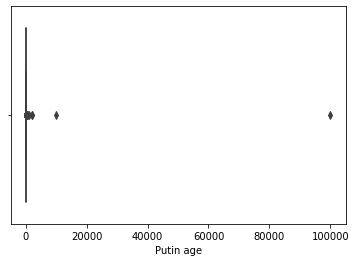

In [ ]:
sns.boxplot(df['Putin age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


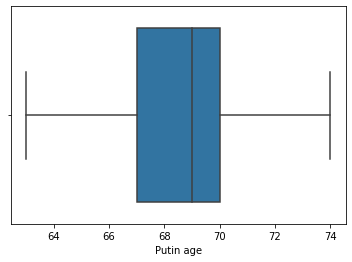

In [ ]:
a,b=df['Putin age'].quantile(0.25), df['Putin age'].quantile(0.75)
df=df[(df['Putin age']<b+1.5*(b-a)) & (df['Putin age']>a-1.5*(b-a))]
sns.boxplot(df['Putin age'])

In [ ]:
df['Putin age'].describe()

count    148.000000
mean      68.777027
std        2.187848
min       63.000000
25%       67.000000
50%       69.000000
75%       70.000000
max       74.000000
Name: Putin age, dtype: float64